In [1]:
import csv
from pandas import DataFrame
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
from scipy.spatial.distance import cdist
from kneed import KneeLocator
%matplotlib inline

In [42]:
# tabela = []
# with open('dados.csv') as csvfile: 
#     reader = csv.reader(csvfile) 
#     for row in reader:
#         tabela.append(row)
# Data = tabela

#df = DataFrame(Data,columns=['sexo', 'idade', 'cidadeNatal', 'cidadeReside', 'estadoCivil', 'cor', 'meioTransporte', 'transportePublico', 'salario', 'ingles', 'atividadeRemunerada', 'escola', 'curso', 'linguagem'])


In [12]:
tabela = []
with open('bin.csv') as csvfile: 
    reader = csv.reader(csvfile) 
    for row in reader:
        tabela.append(row)

In [13]:
Data = tabela
df = DataFrame(Data,columns=['sexo', 'idade', 'cidadeNatal', 'cidadeReside', 'estadoCivil', 'cor', 'meioTransporte', 'transportePublico', 'salario', 'ingles', 'atividadeRemunerada', 'escola', 'curso', 'contatoLinguagem', 'linguagem', 'razao'])

In [14]:
df

,sexo,idade,cidadeNatal,cidadeReside,estadoCivil,cor,meioTransporte,transportePublico,salario,ingles,atividadeRemunerada,escola,curso,contatoLinguagem,linguagem,razao
0,001,0010110,0001,0001,001,010,0,0,011,010,0,001,0010,1,01110,00001
1,001,0100001,0010,1010,001,010,0,1,001,001,1,001,0010,0,00000,00110
2,001,0010110,0001,0001,001,001,0,1,010,011,0,001,0011,1,00111,01000
3,001,0010101,0001,0001,001,010,0,1,001,100,1,001,0100,1,01111,00010
4,011,0011110,0001,0001,001,001,0,0,001,010,0,001,0101,1,01001,00010
5,001,0010110,0001,0001,001,010,0,1,010,010,0,010,0001,1,00101,00110
6,001,0010110,0001,0001,001,001,0,1,001,010,0,001,0110,1,00010,00010
7,001,0010110,0001,1011,001,010,1,1,001,010,0,001,0011,0,00000,00010
8,001,0010001,0001,0001,001,011,0,1,011,010,0,001,0001,1,00000,01001
9,010,0010010,0001,1000,001,001,0,1,010,010,1,011,0010,1,10000,00010


In [15]:
# df2 = df.curso.str.split(',').apply(pd.Series)
# df2.index = df.set_index(['sexo', 'idade', 'cidadeNatal', 'cidadeReside', 'estadoCivil', 'cor', 'meioTransporte', 'transportePublico', 'salario', 'ingles', 'atividadeRemunerada', 'escola', 'linguagem']).index
# df2.stack().reset_index(['sexo', 'idade', 'cidadeNatal', 'cidadeReside', 'estadoCivil', 'cor', 'meioTransporte', 'transportePublico', 'salario', 'ingles', 'atividadeRemunerada', 'escola', 'linguagem'])

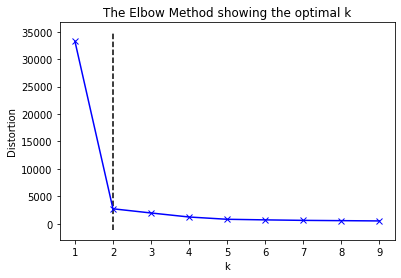

In [16]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Grafico
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

# Mostra o K
kn = KneeLocator(K, distortions, curve='convex', direction='decreasing')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
kn.knee

plt.show()

In [17]:
kmeans = KMeans(n_clusters=kn.knee).fit(df)
centroids = kmeans.cluster_centers_
centroids

array([[1.82608696e+00, 9.46730435e+03, 1.03130435e+02, 1.36130435e+02,
        2.17391304e+00, 1.47826087e+01, 2.60869565e-01, 7.39130435e-01,
        8.00000000e+00, 1.33478261e+01, 4.34782609e-01, 7.82608696e+00,
        6.66521739e+01, 7.82608696e-01, 1.25213043e+03, 4.19913043e+02],
       [1.51428571e+01, 1.02044857e+05, 4.61428571e+01, 1.45142857e+02,
        7.57142857e+00, 6.14285714e+00, 8.57142857e-01, 7.14285714e-01,
        8.14285714e+00, 6.14285714e+00, 7.14285714e-01, 3.71428571e+00,
        6.28571429e+00, 1.42857143e-01, 1.42857143e+01, 1.94857143e+02]])

In [18]:
kmeans.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0])

In [21]:
df['K-classes'] = kmeans.labels_

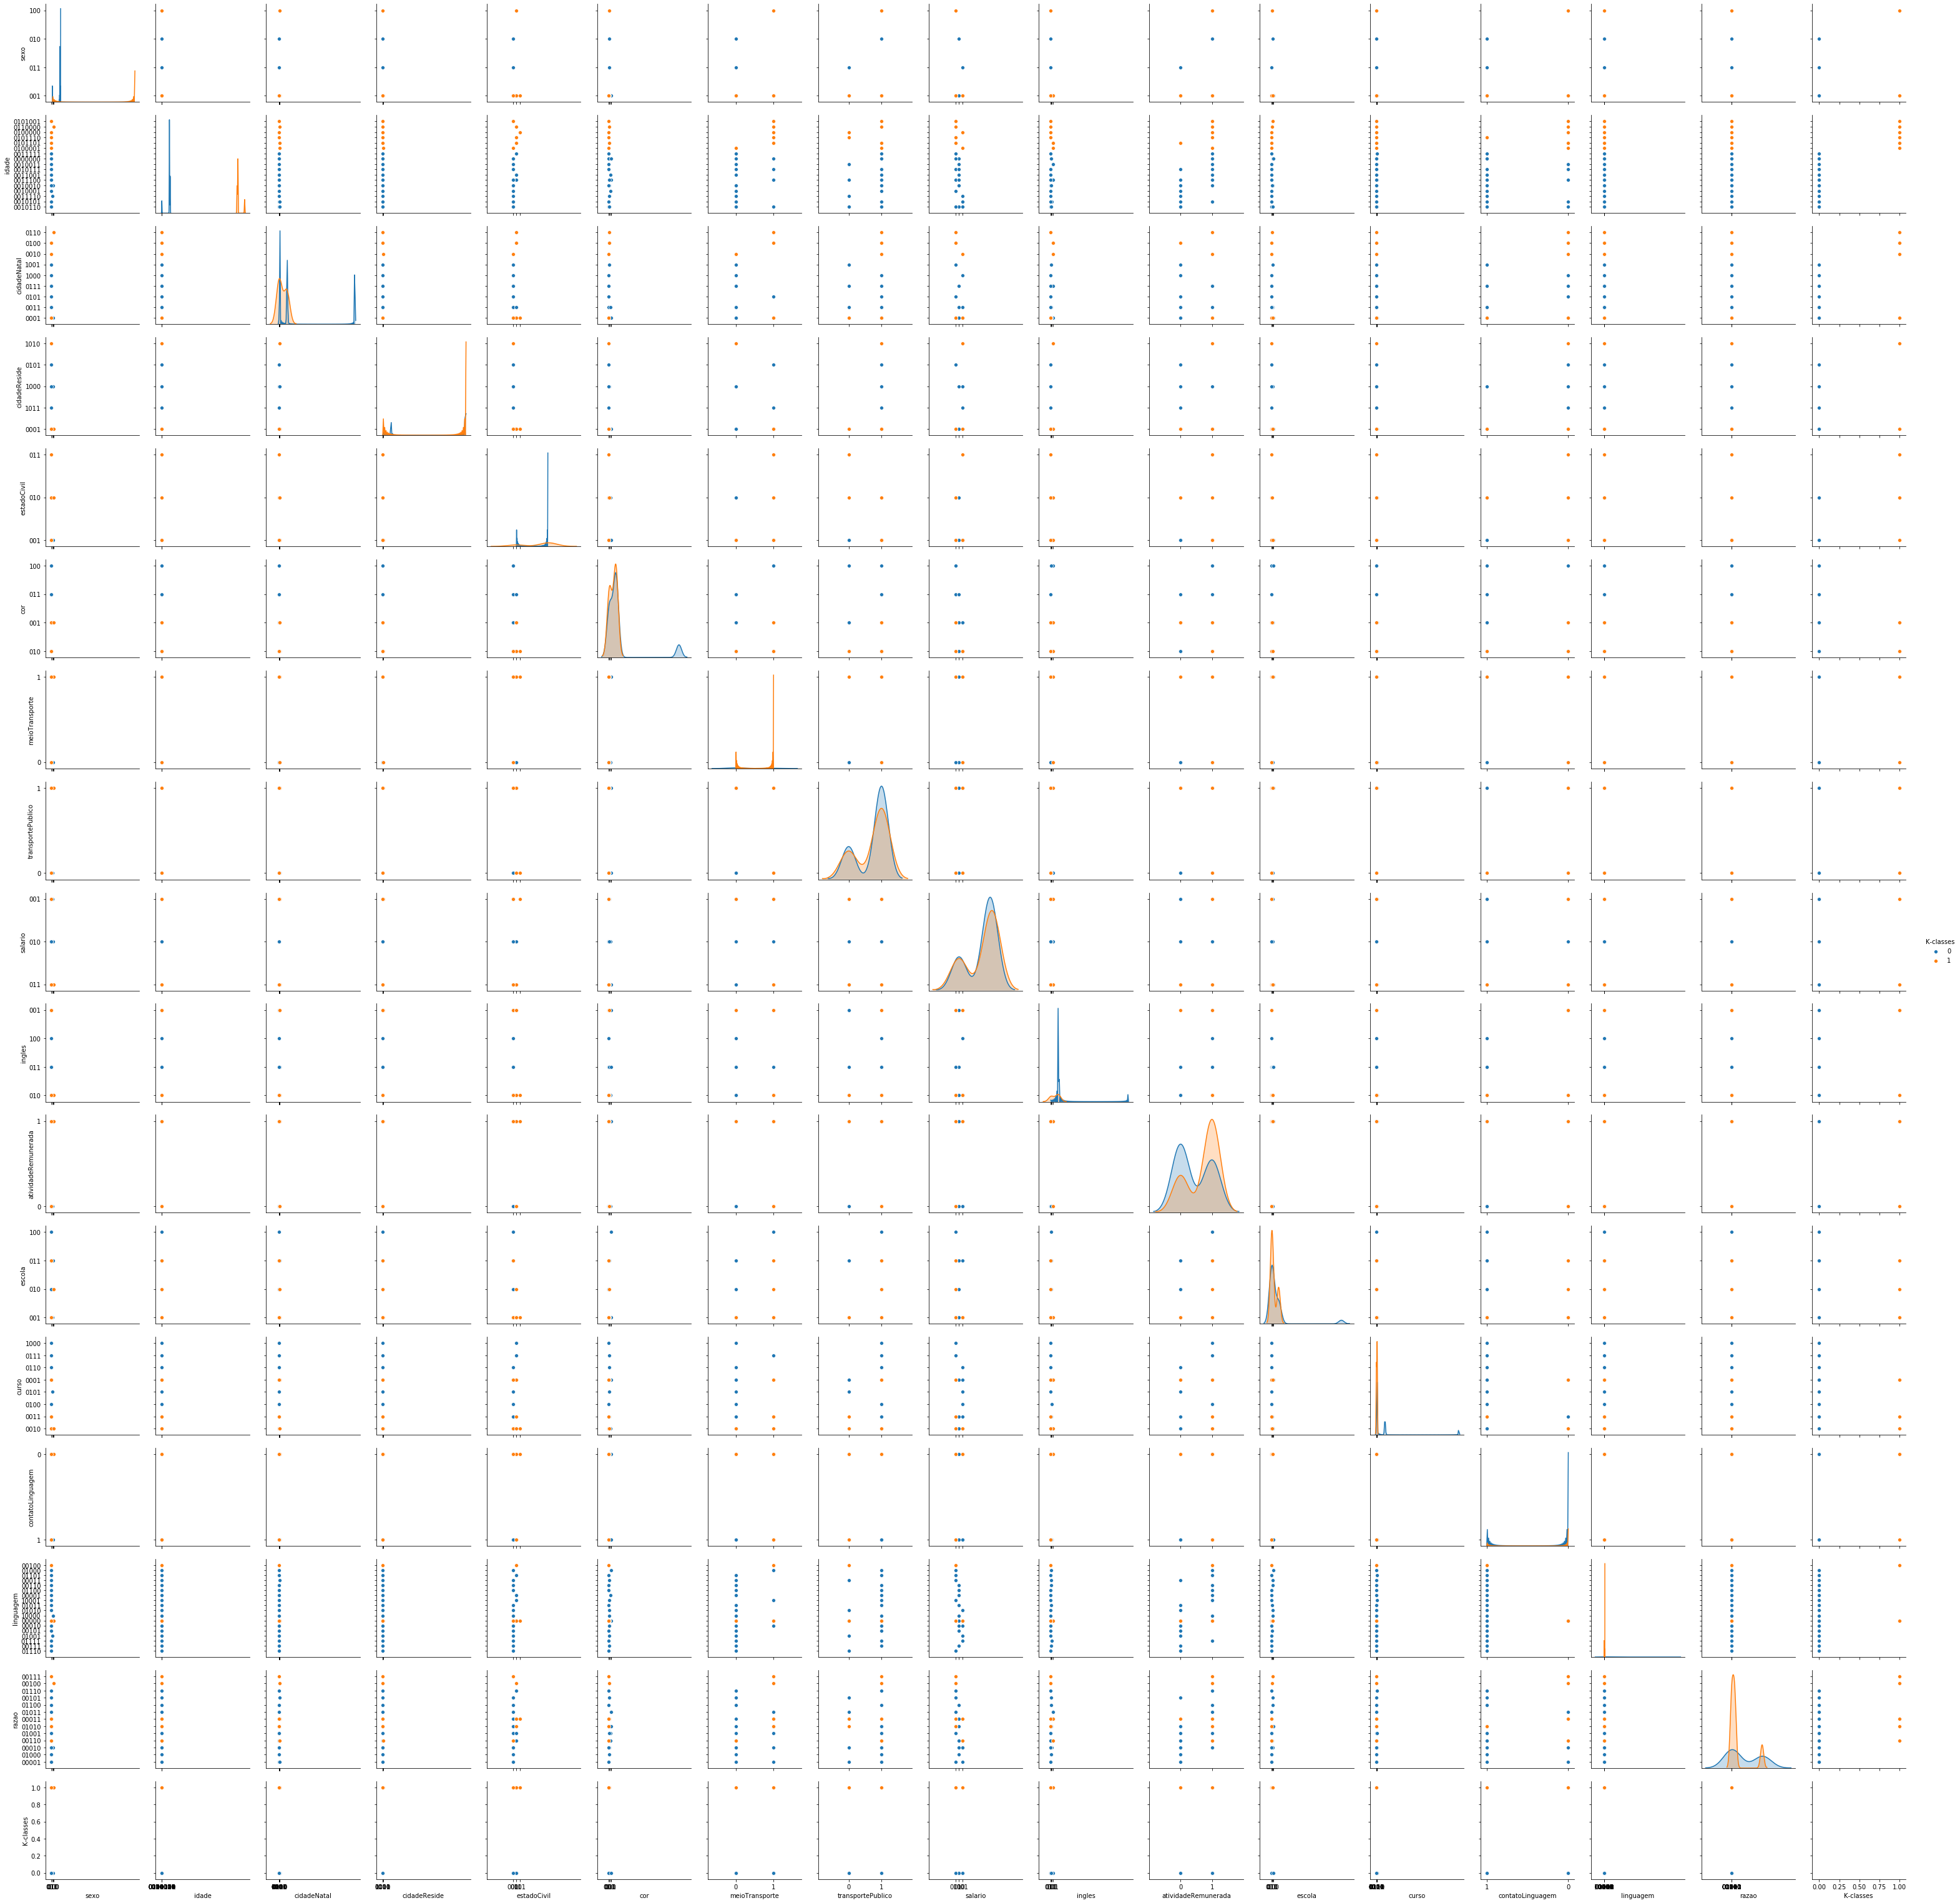

In [22]:
sb.pairplot(df, hue='K-classes')

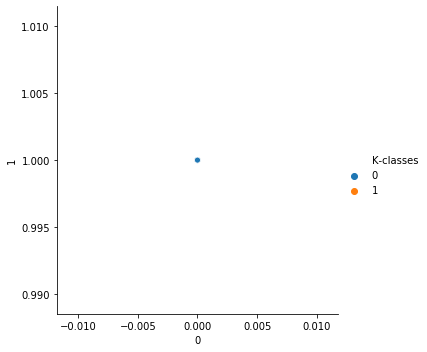

In [23]:
sb.relplot(x=0, y=1, hue="K-classes", data=df);

In [86]:
df

,sexo,idade,cidadeNatal,cidadeReside,estadoCivil,cor,meioTransporte,transportePublico,salario,ingles,atividadeRemunerada,escola,curso,contatoLinguagem,linguagem,razao,K-classes,idadeDecimal
0,001,0010110,0001,0001,001,010,0,0,011,010,0,001,0010,1,01110,00001,0,22
1,001,0100001,0010,1010,001,010,0,1,001,001,1,001,0010,0,00000,00110,1,33
2,001,0010110,0001,0001,001,001,0,1,010,011,0,001,0011,1,00111,01000,0,22
3,001,0010101,0001,0001,001,010,0,1,001,100,1,001,0100,1,01111,00010,0,21
4,011,0011110,0001,0001,001,001,0,0,001,010,0,001,0101,1,01001,00010,0,30
5,001,0010110,0001,0001,001,010,0,1,010,010,0,010,0001,1,00101,00110,0,22
6,001,0010110,0001,0001,001,001,0,1,001,010,0,001,0110,1,00010,00010,0,22
7,001,0010110,0001,1011,001,010,1,1,001,010,0,001,0011,0,00000,00010,0,22
8,001,0010001,0001,0001,001,011,0,1,011,010,0,001,0001,1,00000,01001,0,17
9,010,0010010,0001,1000,001,001,0,1,010,010,1,011,0010,1,10000,00010,0,18


In [85]:
df.dtypes
df['estadoCivil'].value_counts()

001    22
010     7
011     1
Name: estadoCivil, dtype: int64

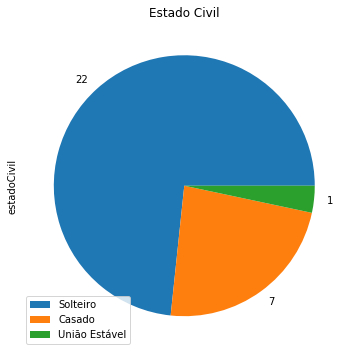

In [131]:
labels=['Solteiro', 'Casado', 'União Estável']
values = df["estadoCivil"].value_counts()
df["estadoCivil"].value_counts().plot.pie(title="Estado Civil", labels=values, figsize=(6, 6))
plt.legend(labels,loc=3)

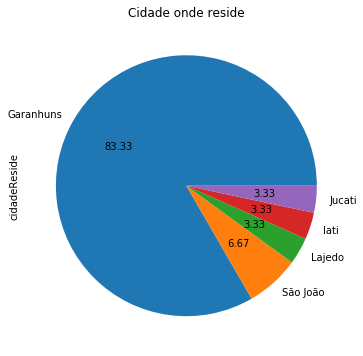

In [67]:
df["cidadeReside"].value_counts().plot.pie(title="Cidade onde reside", labels=['Garanhuns', 'São João', 'Lajedo', 'Iati', 'Jucati'], autopct='%.2f', figsize=(6, 6))

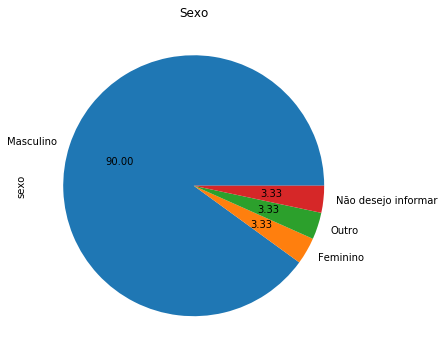

In [116]:
df["sexo"].value_counts().plot.pie(title="Sexo",labels=['Masculino', 'Feminino', 'Outro', 'Não desejo informar'], autopct='%.2f',  figsize=(6, 6))


In [83]:
df["ingles"].value_counts().plot.pie(title="Niveis de inglês",labels=['Pouco', 'Nada', 'Intermediário', 'Avançado'], autopct='%.2f',  figsize=(6, 6))


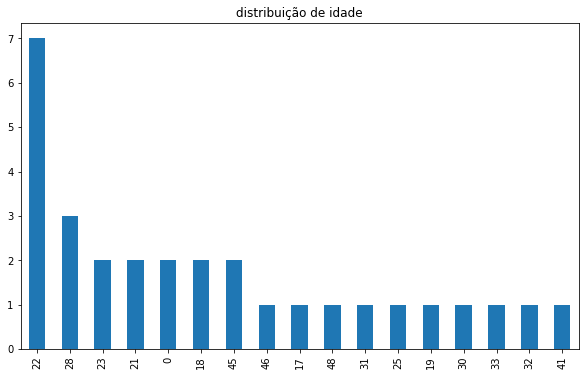

In [110]:

df['idadeDecimal'] = df.idade.apply(lambda x: format(int(x, 2)))
df['idadeDecimal'].value_counts()
df["idadeDecimal"].value_counts().plot.bar(title="distribuição de idade", figsize=(10, 6))


In [113]:
df["idadeDecimal"].value_counts()

22    7
28    3
23    2
21    2
0     2
18    2
45    2
46    1
17    1
48    1
31    1
25    1
19    1
30    1
33    1
32    1
41    1
Name: idadeDecimal, dtype: int64

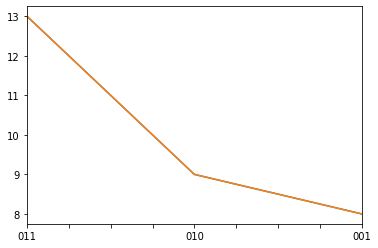

In [109]:
salarios = df['salario'].value_counts()
salarios.plot ()
df['salario'].value_counts().plot()